# Insurance Fraud Detection using Random Forest

# 랜덤 포레스트를 이용한 보험 사기 탐지

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.

보험 사기는 매우 크고 중요한 문제입니다. 다양한 사기가 계속 발생하고 있으며, 일부 수법은 일반화 되어있습니다. 따라서 미리 예측하면 많은 피해를 막을 수 있으며, 비용을 절약할 수 있습니다. 이러한 문제에 대하여 AI는 우리를 도울 수 있습니다.

이 노트북에서는 랜덤 포레스트를 사용한 보험 사기 탐지에 중점을 둘 것입니다.

## Context

우리는 [Kaggle](https://www.kaggle.com/buntyshah/auto-insurance-claims-data)에서 얻은 자동차 보험 청구 데이터로 실습할 것입니다. Kaggle은 데이터 전문가들이 모여 지식을 공유하고 서로 경쟁하여 보상을 받을 수 있는 데이터 공유 플랫폼입니다. 정리된 데이터가 Insurance.csv에 포함되어 있습니다.


### Side note: Random Forest란 무엇인가?

랜덤 포레스트는 많은 의사 결정 트리의 결정을 결합하여 데이터 포인트의 클래스를 결정하는 분류 알고리즘입니다. 우리는 다양한 트리를 기반으로 결정을 내리고 과반수 투표를 수행하고 최종 클래스를 결정합니다. 다음 다이어그램을 보면 좀 더 명확하게 이해할 수 있을 것입니다.

![Random Forest](https://miro.medium.com/max/888/1*i0o8mjFfCn-uD79-F1Cqkw.png)

## Use Python to open csv files


[scikit-learn](https://scikit-learn.org/stable/)과 [pandas](https://pandas.pydata.org/)를 사용하여 데이터 세트를 작업합니다. Scikit-learn은 예측 데이터 분석을 위한 효율적인 도구를 제공하는 매우 유용한 기계 학습 라이브러리입니다. Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.


## Import Libraries


In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Read the CSV file

In [2]:
df = pd.read_csv(r'[Dataset]_Module11_(Insurance).csv')
df.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# 다양한 Feature에 대하여 null 값의 수를 확인합니다.
df.isnull().sum()

Unnamed: 0                                0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 69, dtype: int64

In [4]:
# 각 열의 NaN 개수 계산
nan_counts = df.isna().sum()

# NaN이 하나라도 존재하는 경우 출력
if nan_counts.any():
    print('Nan is here!')

else : print('clean!')

clean!


In [5]:
Temp = pd.DataFrame(nan_counts)
Temp.columns = ['Sum']
print('Amount of rows with missing values : ', str(len(Temp['Sum']>0)))

Amount of rows with missing values :  69


In [6]:
# Dataset에 대한 추가 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

### Task 1: describe 함수를 사용하여 데이터 세트에 대한 정보 표시

In [7]:
# your code here
df.describe()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,25126.100000,-26793.700000,11.644000,1.83900,1.487000,52761.94000,0.247000,0.537000,0.463000,...,0.080000,0.043000,0.04200,0.047000,0.1020,0.153000,0.151000,0.69300,0.001000,0.002000
std,288.819436,27872.187708,28104.096686,6.951373,1.01888,1.111335,26401.53319,0.431483,0.498879,0.498879,...,0.271429,0.202959,0.20069,0.211745,0.3028,0.360168,0.358228,0.46148,0.031623,0.044699
min,0.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,249.750000,0.000000,-51500.000000,6.000000,1.00000,1.000000,41812.50000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,499.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,58055.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,749.250000,51025.000000,0.000000,17.000000,3.00000,2.000000,70592.50000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
max,999.000000,100500.000000,0.000000,23.000000,4.00000,3.000000,114920.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# Fraud_reported가 목표 열입니다. Fraud_reported의 고유값을 확인해 봅시다.
df['fraud_reported'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fraud_reported', ylabel='count'>

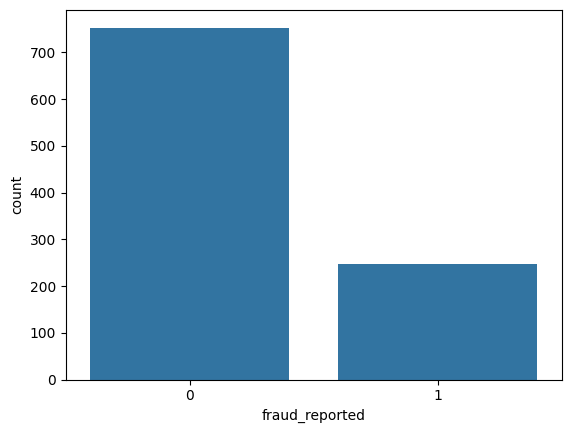

In [9]:
# 다음으로 fraud_reported 열의 0과 1의 분포를 확인할 수 있습니다.
sns.countplot(x="fraud_reported", data=df)

In [10]:
value_counts = df['fraud_reported'].value_counts()
print(value_counts)

fraud_reported
0    753
1    247
Name: count, dtype: int64


In [11]:
print(df[df['fraud_reported'] == 0] ['fraud_reported'].count())
print(df[df['fraud_reported'] == 1] ['fraud_reported'].count())

753
247


## feature간 상관관계 확인

여기서 우리는 상관 다이어그램을 그리기 위하여 plotly 라이브러리를 사용합니다.

상관 행렬은 변수 간의 관계, 즉 다른 변수가 변경될 때 한 변수가 어떻게 변경되는지를 보여주는 테이블입니다. 5개의 변수가 있는 경우 상관 행렬에는 5 곱하기 5 또는 25개의 항목이 있으며 각 항목은 두 변수 간의 상관 관계를 보여줍니다.

기계 학습 알고리즘의 정확도는 알고리즘이 얼마나 잘 수행되고 있는지, 즉 알고리즘이 데이터 포인트를 올바르게 분류하는 빈도를 측정하는 것입니다. 정확도는 다음과 같이 주어집니다:

![정확도](https://miro.medium.com/max/1050/1*O5eXoV-SePhZ30AbCikXHw.png)

정밀도는 관련성 있는 결과의 %를 의미하고, 재현율은 알고리즘에 의해 올바르게 분류된 전체 관련 결과의 %를 의미합니다.


![Precision and Recall](https://miro.medium.com/max/1050/1*pOtBHai4jFd-ujaNXPilRg.png)


True positive: 모델이 긍정 클래스를 올바르게 예측합니다.

True negative: 모델이 부정 클래스를 올바르게 예측합니다.

False positiv: 모델이 긍정 클래스를 잘못 예측합니다.

False negative: 모델이 부정 클래스를 잘못 예측합니다.


우리는  plotly 라이브러리를 사용합니다. <br>
라이브러리가 설치되어 있지 않은 경우 터미널에서 다음 단계를 수행하여 설치해주세요: <br>

pip install plotly

In [12]:
import plotly.express as px
import plotly.graph_objects as go

# pandas의 corr() 함수를 사용하여 상관 행렬 가져오기
corr_matrix = df.corr()

fig = go.Figure(data = go.Heatmap(
                                z = corr_matrix.values,
                                x = list(corr_matrix.columns),
                                y = list(corr_matrix.index)))

fig.update_layout(
    title='Correlation_Insurance_Fraud',  # 따옴표 수정
    width=1000,
    height=1000,
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        tickfont=dict(size=10)
    )
)

fig.show()

In [13]:
features = []
for col in df.columns:
    if col != 'fraud_reported':
        features.append(col)

target = 'fraud_reported'

X = df[features]
y = df[target]

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
# 데이터를 test와 train 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

## 랜덤 포레스트 분류기 적용하기

랜덤 포레스트는 많은 의사 결정 트리의 결정을 결합하여 데이터 포인트의 클래스를 결정하는 분류 알고리즘입니다. 우리는 다양한 트리를 기반으로 결정을 내리고 과반수 투표를 수행하고 최종 클래스를 결정합니다.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Task 2: 랜덤 포레스트 분류기를 사용하여 훈련 데이터를 예측하고 결과를 변수 preds에 저장


In [17]:
# your code here
rfc_preds = rfc.predict(X_test)

In [18]:
score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, rfc_preds))


83.6

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       180
           1       0.76      0.60      0.67        70

    accuracy                           0.84       250
   macro avg       0.81      0.76      0.78       250
weighted avg       0.83      0.84      0.83       250



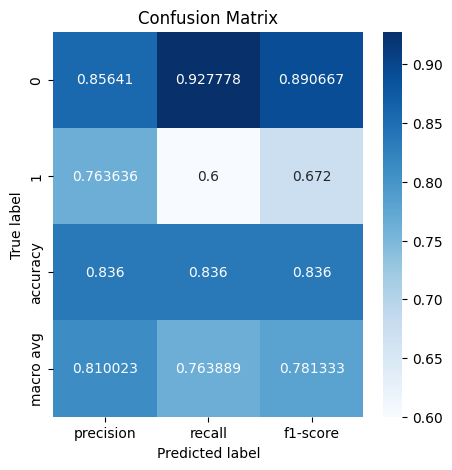

In [24]:
# 정확도 시각화(히트맵)
import matplotlib.pyplot as plt
import seaborn as sns

# 분류 보고서 생성
report = classification_report(y_test, rfc_preds, output_dict=True)

# DataFrame으로 변환
df_cm = pd.DataFrame(report).iloc[:-1, :-1].T

# 히트맵 그리기
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


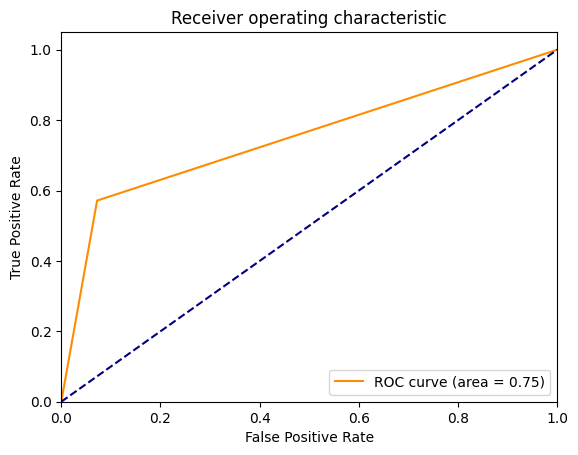

In [ ]:
# ROC 곡선 (ROC 커브)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC 곡선 그리기 (이진 분류 문제일 경우)
fpr, tpr, thresholds = roc_curve(y_test, rfc_preds)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Task 3: 랜덤 포레스트 분류기의 결과를 보았습니다. 이제 의사 결정 트리 분류기를 사용하여 데이터를 분류해 보세요.¶

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 의사 결정 트리 모델
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# 성능 평가
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       180
           1       0.58      0.51      0.55        70

    accuracy                           0.76       250
   macro avg       0.70      0.68      0.69       250
weighted avg       0.75      0.76      0.76       250



### Task 4: 의사 결정 트리 분류기의 결과를 보았습니다. 이제 로지스틱 회귀 분류기를 사용하여 데이터를 분류해 보세요.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 로지스틱 회귀 모델 생성
lr = LogisticRegression()

# 모델 학습
lr.fit(X_train, y_train)

# 테스트 데이터 예측
lr_preds = lr.predict(X_test)

# 성능 평가
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       180
           1       0.80      0.57      0.67        70

    accuracy                           0.84       250
   macro avg       0.82      0.76      0.78       250
weighted avg       0.84      0.84      0.83       250



Random Forest Accuracy: 0.828
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       180
           1       0.75      0.57      0.65        70

    accuracy                           0.83       250
   macro avg       0.80      0.75      0.77       250
weighted avg       0.82      0.83      0.82       250

Decision Tree Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       180
           1       0.58      0.51      0.55        70

    accuracy                           0.76       250
   macro avg       0.70      0.68      0.69       250
weighted avg       0.75      0.76      0.76       250

Logistic Regression Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       180
           1       0.80      0.57      0.67        70

    accuracy                           0.84       250
   macro avg       0.82      0.76 

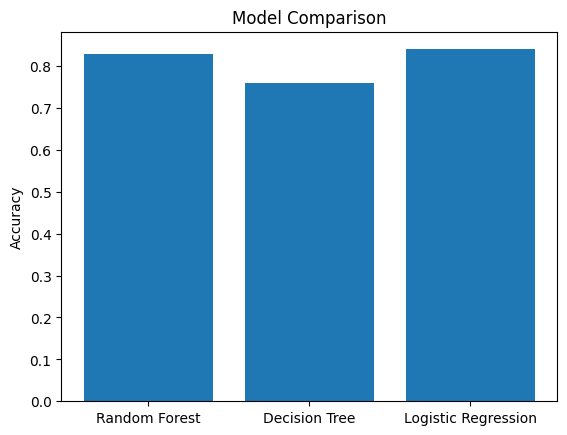

In [ ]:
# 성능 평가
def evaluate_model(model, y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy:", accuracy)
    print(classification_report(y_true, y_pred))

evaluate_model(rfc, y_test, rfc_preds, "Random Forest")
evaluate_model(dt, y_test, dt_preds, "Decision Tree")
evaluate_model(lr, y_test, lr_preds, "Logistic Regression")

# 정확도 비교 시각화
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_score(y_test, rfc_preds),
              accuracy_score(y_test, dt_preds),
              accuracy_score(y_test, lr_preds)]

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

### Conclusion



인공 지능은 다양한 현대 사회의 문제를 해결하는데 널리 사용되고 있습니다. 이 노트북에서는 랜덤 포레스트 알고리즘을 사용하여 사기 탐지에 인공 지능을 사용하는 방법의 예를 보았습니다. 같은 목적으로 다른 모델을 사용할 수도 있습니다. 추가적으로 다른 모델을 적용하였을 때 정확도를 비교해 보는 연습을 해보세요.